d:\users\asus\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:65: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


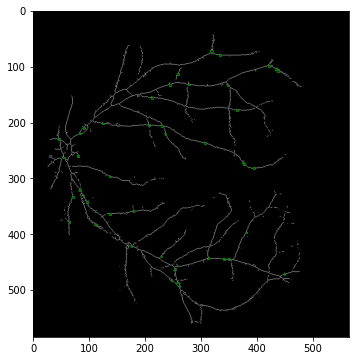

In [26]:
import io
import numpy as np    
from PIL import Image
from scipy import ndimage
from IPython.display import display # to display images
from skimage.measure import label, regionprops
import matplotlib.patches as mpatches
from skimage.segmentation import clear_border
from skimage.color import label2rgb
from skimage import morphology
from matplotlib import pyplot as plt

image_string = open('image/skeleton/21_bloodvessel.png', 'rb').read()
img = Image.open(io.BytesIO(image_string))
arr = np.asarray(img)

structure = [
    [
        [0,1,0],
        [1,1,1],
        [0,1,0]
    ],
    [
        [0,1,0],
        [0,1,0],
        [1,0,1]
    ],
    [
        [0,1,0],
        [1,1,1],
        [1,0,1]
    ],
    [
        [0,1,0],
        [1,0,1],
        [1,0,1]
    ],
    [
        [1,0,1],
        [1,0,1],
        [0,1,0]
    ],
    [
        [1,0,1],
        [0,1,0],
        [1,0,1]
    ],
    [
        [1,0,0,0,1],
        [0,1,0,1,0],
        [0,0,1,0,0],
        [0,0,1,0,0],
        [0,0,1,0,0],
    ],
    [
        [0,0,1,0,0],
        [0,0,1,0,0],
        [0,1,1,1,0],
        [1,0,1,0,1],
        [1,0,1,0,1],
    ],
]
result = 0
for struct in structure:
    result = result + ndimage.binary_hit_or_miss(arr, struct).astype(np.int)
# founded = np.where(result == 1)
result=morphology.dilation(result)

# remove artifacts connected to image border
cleared = clear_border(result)

# label image regions
label_image = label(cleared)
# to make the background transparent, pass the value of `bg_label`,
# and leave `bg_color` as `None` and `kind` as `overlay`
image_label_overlay = label2rgb(label_image, image=arr, bg_label=0)

fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 1:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='green', linewidth=1)
        ax.add_patch(rect)

# ax.set_axis_off()
# plt.tight_layout()
plt.show()

d:\users\asus\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:20: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


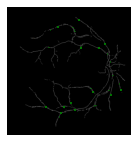

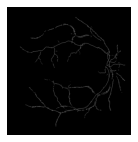

In [14]:
import io
import numpy as np    
from PIL import Image
from scipy import ndimage
from IPython.display import display # to display images
from skimage.measure import label, regionprops
import matplotlib.patches as mpatches
from skimage.segmentation import clear_border
from skimage.color import label2rgb
from skimage import morphology
from matplotlib import pyplot as plt

image_string = open('image/skeleton/25_bloodvessel.png', 'rb').read()
img = Image.open(io.BytesIO(image_string))
arr = np.asarray(img)
    
def detectBranch(ax,structure,color):
    result = 0
    for struct in structure:
        result = result + ndimage.binary_hit_or_miss(arr, struct).astype(np.int)
    result=morphology.dilation(result)

    # remove artifacts connected to image border
    cleared = clear_border(result)

    # label image regions
    label_image = label(cleared)
    # to make the background transparent, pass the value of `bg_label`,
    # and leave `bg_color` as `None` and `kind` as `overlay`
    image_label_overlay = label2rgb(label_image, image=arr, bg_label=0)
    ax.imshow(image_label_overlay)
    rctngl = []
    for region in regionprops(label_image):
        # take regions with large enough areas
        if region.area >= 1:
            # draw rectangle around segmented coins
            minr, minc, maxr, maxc = region.bbox
            rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                      fill=False, edgecolor=color, linewidth=1)
            rctngl.append(rect)
            ax.add_patch(rect)

    ax.set_axis_off()
    plt.tight_layout()
    plt.show()
bifurcation = [
    [
        [0,1,0],
        [0,1,0],
        [1,0,1]
    ],
    [
        [0,1,0],
        [1,1,1],
        [1,0,1]
    ],
    [
        [0,1,0],
        [1,0,1],
        [1,0,1]
    ],
    [
        [1,0,1],
        [1,0,1],
        [0,1,0]
    ],
]
trifurcation = [
    [
        [0,0,0,0,0,0,0],
        [0,0,0,1,0,0,0],
        [0,0,1,1,1,0,0],
        [0,1,0,1,0,1,0],
        [1,0,0,1,0,0,1],
    ],
    [
        [0,0,0,0,0,0,0],
        [0,0,1,1,1,0,0],
        [0,1,0,1,0,1,0],
        [1,0,0,1,0,0,1],
        [1,0,0,1,0,0,1],
    ],
    [
        [0,1,0,0,0,1,0],
        [0,0,1,0,1,0,0],
        [0,0,0,1,0,0,0],
        [0,0,1,1,1,0,0],
        [0,1,0,1,0,1,0],
    ],
]
ax = plt.subplot(2,1,1)
detectBranch(ax,bifurcation,'green')
ax = plt.subplot(2,1,2)
detectBranch(ax,trifurcation,'blue')